In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = {'Value': [10, 12, 15, 11, 13, 14, 100, 16, 18, 12]}
df = pd.DataFrame(data)

In [3]:
df.head()

,Value
0,10
1,12
2,15
3,11
4,13


In [4]:
# Method 1: Using IQR (Interquartile Range)
def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers
 
outliers_iqr = detect_outliers_iqr(df['Value'])
print("Outliers (IQR):", outliers_iqr)
 

Outliers (IQR): 6    100
Name: Value, dtype: int64


In [9]:
# Method 2: Using Z-score
def detect_outliers_zscore(data):
    z = np.abs((data - np.mean(data)) / np.std(data))
    outliers = data[z > 2]  # Adjust threshold as needed
    return outliers
 
outliers_zscore = detect_outliers_zscore(df['Value'])
print("Outliers (Z-score):", outliers_zscore)

Outliers (Z-score): 6    100
Name: Value, dtype: int64


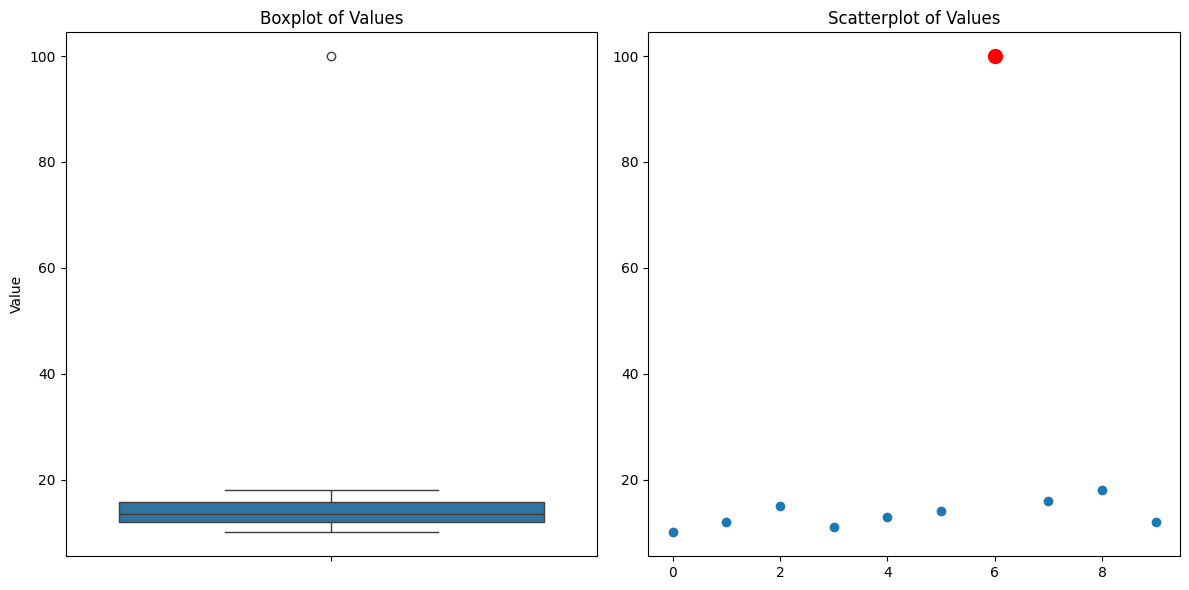

In [10]:
 
# Data Visualization
plt.figure(figsize=(12, 6))
 
# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Value'])
plt.title('Boxplot of Values')
 
# Scatterplot
plt.subplot(1, 2, 2)
plt.scatter(range(len(df['Value'])), df['Value'])
plt.title('Scatterplot of Values')
 
# Highlight outliers (using IQR method for demonstration)
for outlier in outliers_iqr.index:
    plt.scatter(outlier, df['Value'][outlier], color='red', marker='o', s=100)
 
plt.tight_layout()
plt.show()
 

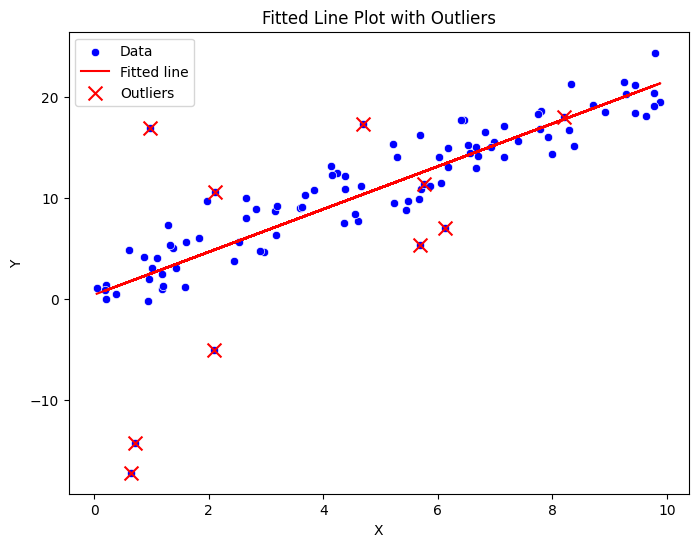

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
 
# Generate synthetic data
np.random.seed(0)
x = np.random.rand(100, 1) * 10  # X values
y = 2 * x + 1 + np.random.randn(100, 1) * 2  # Y values with some noise
 
# Add outliers
num_outliers = 10
outlier_indices = np.random.choice(range(100), num_outliers, replace=False)
y[outlier_indices] = y[outlier_indices] + np.random.randn(num_outliers, 1) * 15  # Larger deviations for outliers
 
# Convert to a DataFrame
data = pd.DataFrame({'X': x.flatten(), 'Y': y.flatten()})
 
# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
 
# Predictions from the fitted model
y_pred = model.predict(x)
 
# Plot the data, fitted line, and highlight outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='X', y='Y', label='Data', color='blue')
plt.plot(x, y_pred, color='red', label='Fitted line')
 
# Highlight outliers
plt.scatter(data['X'][outlier_indices], data['Y'][outlier_indices], color='red', label='Outliers', s=100, marker='x')
 
 
plt.title('Fitted Line Plot with Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
 

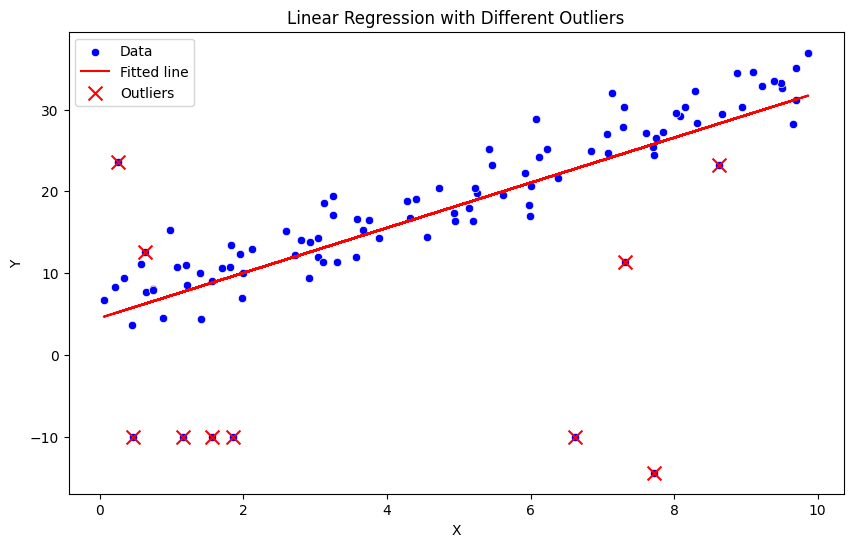

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
 
# Generate synthetic data with different outlier characteristics
np.random.seed(42)  # for reproducibility
x = np.random.rand(100, 1) * 10
y = 3 * x + 5 + np.random.randn(100, 1) * 3
 
# Introduce outliers (different types)
outlier_indices = np.random.choice(range(100), 5, replace=False)
y[outlier_indices] = y[outlier_indices] + np.random.randn(5, 1) * 20  # Large deviations
 
outlier_indices2 = np.random.choice(range(100), 5, replace=False)
y[outlier_indices2] = -10 #Points far away from other points
 
# Convert to DataFrame
data = pd.DataFrame({'X': x.flatten(), 'Y': y.flatten()})
 
 
# Fit linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
 
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='X', y='Y', label='Data', color='blue')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.scatter(data['X'][np.concatenate((outlier_indices,outlier_indices2))], data['Y'][np.concatenate((outlier_indices,outlier_indices2))], color='red', label='Outliers', s=100, marker='x')
 
plt.title('Linear Regression with Different Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
 


